# Sum of squared residuals

## Theory introduction

The performance of a model can be quantified in a single number. One measure we can use is the Sum of Squared Residuals, $\mathrm{SSR}$. Here we take all of the residuals (the difference between the measured and predicted data), square them and add them together.

For demonstrating a frequency vector $\vec{f} = [f_1, f_2, f_3, ...]$, we can introduce the Normal (or Gaussian) distribution:

$$ \mathcal{N}(\mu,\sigma^2): g(x) = \frac{1}{\sqrt{2\pi}\sigma}\exp\left\{{\frac{-(x-\mu)^2}{2\sigma^2}}\right\}  $$

Where $\mu$ is the mathematical expectation (or mean value), and $\sigma$ is the standard deviation:

$$ \sigma = \sqrt{\frac{1}{N}\sum_{i=1}^N(f_i - \mu)^2 } $$

The standard deviation is a measure of the amount of variation or dispersion of a set of values. A low standard deviation indicates that the values tend to be close to the mean (also called the expected value) of the set, while a high standard deviation indicates that the values are spread out over a wider range.

We put these two parameters in a vector:

$$ \vec{p} = [\mu, \sigma]$$

Then, the sum of squared residuals $\mathrm{SSR}$ can be written as:

$$ \mathrm{SSR}(\vec{p}) = |\vec{f} - \vec{g}_p|^2 = \sum_{i=i_{initial}}^{i=i_{end}}[{\vec{f}(i)-\vec{g}_p(i)}]^2 $$


## Example

For a frequency vector $\vec{f}$:

| Value | Frequency |
| -     | -         |
| $0$   | $0.0000$  |
| $1$   | $0.0125$  |
| $2$   | $0.0750$  |
| $3$   | $0.1250$  |
| $4$   | $0.2250$  |
| $5$   | $0.2000$  |
| $6$   | $0.2125$  |
| $7$   | $0.1000$  |
| $8$   | $0.0375$  |
| $9$   | $0.0125$  |

We print it:

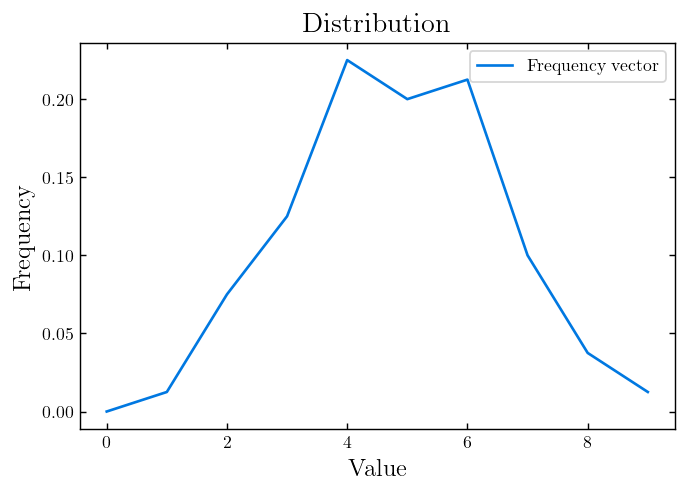

In [245]:
import numpy as np; 
import matplotlib; import matplotlib.pyplot as plt

frequency = np.array([0.0000,0.0125,0.0750,0.1250,0.2250,0.2000,0.2125,0.1000,0.0375,0.0125])
value_scale = np.arange(0, len(frequency), 1)

plt.figure(dpi=128); params = {"text.usetex":True, "font.family":"serif", "mathtext.fontset":"cm", "axes.titlesize": 16, "axes.labelsize":14, "figure.facecolor":"w"}
matplotlib.rcParams.update(params)
plt.tick_params(direction="in",top=True,right=True,bottom=True,left=True)
plt.title("Distribution"); plt.xlabel(r"Value"); plt.ylabel(r"Frequency")
plt.plot(value_scale, frequency, label=r"Frequency vector", color = "#0078E1")
plt.legend(loc="best")


We introduce a specific $\mathrm{SSR}$ vector in a Normal distribution:

$$ \vec{p} = [\mu = 5, \sigma = 2.5] $$

$$ g_p (x) = \left.\frac{1}{\sqrt{2\pi}\sigma}\exp\left\{{\frac{-(x-\mu)^2}{2\sigma^2}}\right\} \right|_{\mu = 5, \sigma = 2.5} $$

Then, we put it into the diagram:


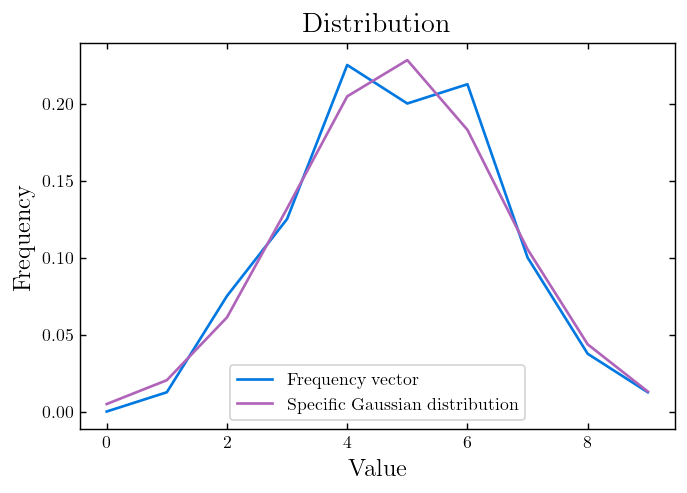

In [246]:
mu = 4.83; sigma = 1.74; params = ([mu, sigma])

gaussian = np.exp(-(value_scale-mu)**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))

plt.figure(dpi=128); params = {"text.usetex":True, "font.family":"serif", "mathtext.fontset":"cm", "axes.titlesize": 16, "axes.labelsize":14, "figure.facecolor":"w"}
matplotlib.rcParams.update(params)
plt.tick_params(direction="in",top=True,right=True,bottom=True,left=True)
plt.title("Distribution"); plt.xlabel(r"Value"); plt.ylabel(r"Frequency")
plt.plot(value_scale, frequency, label=r"Frequency vector", color = "#0078E1")
plt.plot(value_scale, gaussian, label=r"Specific Gaussian distribution", color = "#AF64B9")
plt.legend(loc="best")

We can calculate this $\mathrm{SSR}$:

$$ \mathrm{SSR}(\vec{p}) = \left.\sum_{i=i_{initial}}^{i=i_{end}}[{f(i)-g_p(i)}]^2\right|_{i_{initial}=0, i_{end}=9} $$


In [247]:
# SSR calculation

Module_square = (frequency - gaussian)**2

SSR = np.sum(Module_square)

print("When the mathematical expectation is", mu, "and the standard deviation is", sigma ,"\n The sum of squared residuals is", SSR)

When the mathematical expectation is 4.83 and the standard deviation is 1.74 
 The sum of squared residuals is 0.002478899479205985


Finally, we can create a phase diagram that demonstrates $\mathrm{SSR}$ intuitively.

In [248]:
# Phase calculation

mu_scale = np.arange(0, 10, 0.005); sigma_scale = np.arange(0.5, 5.5, 0.005); cycle = 0

mu_mesh, sigma_mesh = np.meshgrid(mu_scale, sigma_scale)

for value_var in value_scale:
    SSR_component = np.square(frequency[value_var]-np.exp(-(value_var-mu_mesh)**2/(2*sigma_mesh**2))/(sigma_mesh*np.sqrt(2*np.pi)))
    cycle = cycle + 1
    if (cycle == 1):
        SSR_mesh = SSR_component
    else:
        SSR_mesh = SSR_mesh + SSR_component

In [249]:
# Find the optimal solution

opt = np.min(SSR_mesh)
sigma_loc, mu_loc = np.where(SSR_mesh == np.min(SSR_mesh))

print("For the optimal solution, SSR is", opt, "\n The mathematical expectation is", mu_scale[mu_loc], "\n The standard deviation is", sigma_scale[sigma_loc])

For the optimal solution, SSR is 0.0024788994792059845 
 The mathematical expectation is [4.83] 
 The standard deviation is [1.74]


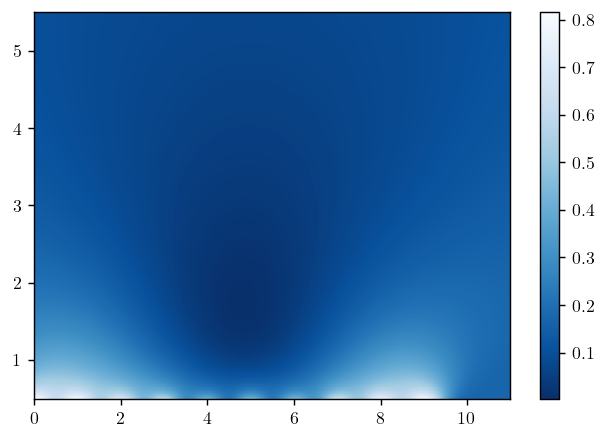

In [250]:
# Phase plotting

plt.figure(dpi=128); params = {"text.usetex":True, "font.family":"serif", "mathtext.fontset":"cm", "axes.titlesize": 16, "axes.labelsize":14, "figure.facecolor":"w"}
matplotlib.rcParams.update(params)

plt.pcolormesh(mu_scale, sigma_scale, SSR_mesh, cmap="Blues_r", shading='auto')
plt.colorbar()

plt.show()